In [1]:
import pandas as pd

In [2]:
!wget https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000268/data/data.tar.gz ~ /data.tar.gz

--2024-01-20 07:07:51--  https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000268/data/data.tar.gz
Resolving aistages-api-public-prod.s3.amazonaws.com (aistages-api-public-prod.s3.amazonaws.com)... 52.219.206.87, 52.219.56.38, 52.219.206.19, ...
Connecting to aistages-api-public-prod.s3.amazonaws.com (aistages-api-public-prod.s3.amazonaws.com)|52.219.206.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20249870 (19M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  19.31M  7.88MB/s    in 2.4s    

2024-01-20 07:07:54 (7.88 MB/s) - ‘data.tar.gz’ saved [20249870/20249870]

/root: Scheme missing.
/data.tar.gz: Scheme missing.
FINISHED --2024-01-20 07:07:54--
Total wall clock time: 3.3s
Downloaded: 1 files, 19M in 2.4s (7.88 MB/s)


In [3]:
!tar -zxvf data.tar.gz

data/
data/train_data.csv
data/test_data.csv
data/sample_submission.csv


In [4]:
train_df = pd.read_csv('/content/data/train_data.csv')
test_df = pd.read_csv('/content/data/test_data.csv')

In [5]:
train_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [6]:
train_df.shape

(2266586, 6)

In [7]:
test_df.shape

(260114, 6)

#Redefine Train data and Test data

test data 중 각 유저의 마지막 행("answerCode==-1")을 제외하고는 학습 데이터로 활용이 가능합니다.

이 성질을 이용해 train data 와 test data를 재정의합니다.

In [8]:
all_df = pd.concat((train_df, test_df))
train_df = all_df[all_df["answerCode"] > -1]
test_df = all_df[all_df["answerCode"] == -1]

In [9]:
train_df.shape

(2525956, 6)

In [10]:
test_df.shape

(744, 6)

In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526700 entries, 0 to 260113
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   userID            int64 
 1   assessmentItemID  object
 2   testId            object
 3   answerCode        int64 
 4   Timestamp         object
 5   KnowledgeTag      int64 
dtypes: int64(3), object(3)
memory usage: 134.9+ MB


## Timestamp

Timestamp를 이용한 EDA

In [12]:
from datetime import datetime

all_df['DateTime'] = all_df['Timestamp'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [13]:
all_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,DateTime
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24 00:17:11
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24 00:17:14
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24 00:17:22
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24 00:17:29
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24 00:17:36


In [14]:
all_df["DayOfWeek"] = all_df["DateTime"].dt.day_of_week
all_df["Hour"] = all_df["DateTime"].dt.hour
all_df["Minute"] = all_df["DateTime"].dt.minute

In [15]:
all_df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,DateTime,DayOfWeek,Hour,Minute
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24 00:17:11,1,0,17
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24 00:17:14,1,0,17
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24 00:17:22,1,0,17
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24 00:17:29,1,0,17
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24 00:17:36,1,0,17


In [16]:
all_df.groupby("DayOfWeek").agg({"answerCode":["mean","count"]})

answerCode        
                mean   count
DayOfWeek                   
0           0.675781  356518
1           0.667045  510739
2           0.641120  422974
3           0.657922  494501
4           0.643650  431405
5           0.603369  174192
6           0.674146  136371

In [17]:
all_df.groupby("Hour").agg({"answerCode":["mean","count"]})

answerCode        
           mean   count
Hour                   
0      0.650462  112557
1      0.644876  153228
2      0.642090  176343
3      0.633329  159047
4      0.633352  166435
5      0.624684  182822
6      0.628330  186410
7      0.641452  184748
8      0.669495  175819
9      0.682831  157216
10     0.699822  159752
11     0.709857  166625
12     0.714375  133812
13     0.705059   74408
14     0.693363   31702
15     0.664223   14188
16     0.578067   12310
17     0.544916   13837
18     0.541545   17138
19     0.531890   23738
20     0.535694   29487
21     0.585871   38756
22     0.643062   66216
23     0.658813   90106

In [18]:
all_df.groupby("Minute").agg({"answerCode":["mean","count"]})

answerCode       
             mean  count
Minute                  
0        0.651434  41249
1        0.657001  40831
2        0.649603  41453
3        0.650854  41570
4        0.656319  41489
5        0.656195  41349
6        0.659989  41284
7        0.648947  41988
8        0.656196  41957
9        0.656804  42043
10       0.652509  42522
11       0.654758  41959
12       0.657362  41090
13       0.654837  42041
14       0.655437  42149
15       0.654459  42215
16       0.649958  42552
17       0.655722  42001
18       0.656260  42282
19       0.653511  42059
20       0.655882  42407
21       0.655027  41867
22       0.660526  42395
23       0.655354  42107
24       0.653112  42100
25       0.658831  42372
26       0.650927  42759
27       0.651113  42455
28       0.652923  42492
29       0.658063  41961
30       0.655053  42479
31       0.657935  42220
32       0.653110  42489
33       0.658196  41986
34       0.654206  42213
35       0.652574  42245
36       0.652716  41695
37       0.648737  42481
38       0.657209  42294
39       0.652800  41996
40       0.655767  42021
41       0.655225  41572
42       0.657908  42132
43       0.656837  42624
44       0.653056  42811
45       0.649652  42689
46       0.657069  42300
47       0.654741  41786
48       0.651413  42219
49       0.656403  42480
50       0.651189  42771
51       0.653213  42813
52       0.652931  42542
53       0.646322  42468
54       0.658214  42079
55       0.647233  42331
56       0.651280  42071
57       0.651776  42352
58       0.650938  42090
59       0.655996  41453

## Big category and Tag

assessmentItemID의 3번째 글자가 대분류라고 합니다.

In [19]:
all_df["BigCategory"] = all_df["assessmentItemID"].apply(lambda x:int(x[2]))

In [20]:
all_df.groupby("BigCategory").agg({"answerCode":["mean","count"]})

answerCode        
                  mean   count
BigCategory                   
1             0.801241  303750
2             0.737515  297350
3             0.701733  303450
4             0.679714  300500
5             0.658649  306400
6             0.711898  296350
7             0.521167  315300
8             0.500224  271950
9             0.454470  131650

In [21]:
all_df.groupby("KnowledgeTag").agg({"answerCode":["mean","count"]})

answerCode      
                   mean count
KnowledgeTag                 
23             0.593000  2000
24             0.625000   400
25             0.850000   100
26             0.610741  2700
30             0.530000   600
...                 ...   ...
11253          0.731875  4800
11265          0.674000   500
11269          0.558519  2700
11270          0.480000   300
11271          0.451667   600

[912 rows x 2 columns]

In [22]:
all_df.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag', 'DateTime', 'DayOfWeek', 'Hour', 'Minute',
       'BigCategory'],
      dtype='object')

In [23]:
all_df.shape

(2526700, 11)

In [24]:
all_df = all_df.sort_values(by=["userID", "Timestamp"], axis=0)

In [25]:
tag_cumsum = all_df.groupby(['userID', 'KnowledgeTag'])['answerCode'].agg(['cumsum', 'cumcount'])
item_cumsum = all_df.groupby(['userID', 'assessmentItemID'])['answerCode'].agg(['cumsum', 'cumcount'])

all_df['TagO'] = 0
all_df['TagX'] = 0

all_df['TagO'] = tag_cumsum['cumsum'] - all_df["answerCode"]
all_df['TagX'] = tag_cumsum['cumcount'] - all_df['TagO']
all_df['TagCount'] = all_df['TagO'] + all_df['TagX']


all_df['ItemO'] = 0
all_df['ItemX'] = 0

all_df['ItemO'] = item_cumsum['cumsum'] - all_df["answerCode"]
all_df['ItemX'] = item_cumsum['cumcount'] - all_df['ItemO']
all_df['itemCount'] = all_df['ItemO'] + all_df['ItemX']

In [26]:
all_df.head(100)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,DateTime,DayOfWeek,Hour,Minute,BigCategory,TagO,TagX,TagCount,ItemO,ItemX,itemCount
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24 00:17:11,1,0,17,6,0,0,0,0,0,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24 00:17:14,1,0,17,6,0,0,0,0,0,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24 00:17:22,1,0,17,6,1,0,1,0,0,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24 00:17:29,1,0,17,6,2,0,2,0,0,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24 00:17:36,1,0,17,6,3,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,A060022003,A060000022,1,2020-04-28 00:47:10,593,2020-04-28 00:47:10,1,0,47,6,0,1,1,0,0,0
96,0,A060022004,A060000022,1,2020-04-28 00:47:24,593,2020-04-28 00:47:24,1,0,47,6,1,1,2,0,0,0
97,0,A060022005,A060000022,1,2020-04-28 00:47:41,593,2020-04-28 00:47:41,1,0,47,6,2,1,3,0,0,0
98,0,A060022006,A060000022,0,2020-04-28 00:47:50,593,2020-04-28 00:47:50,1,0,47,6,3,1,4,0,0,0


In [27]:
all_df.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag', 'DateTime', 'DayOfWeek', 'Hour', 'Minute',
       'BigCategory', 'TagO', 'TagX', 'TagCount', 'ItemO', 'ItemX',
       'itemCount'],
      dtype='object')

In [28]:
viz = []
for x in ['DayOfWeek', 'Hour', 'Minute','BigCategory', 'TagO', 'TagX', 'ItemO', 'ItemX', 'TagCount','itemCount']:
  viz.append(all_df.groupby(x)["answerCode"].agg(["mean","count"]))

In [29]:
viz[-1]

,mean,count
itemCount,,
0,0.654363,2476706
1,0.647088,49100
2,0.454139,894


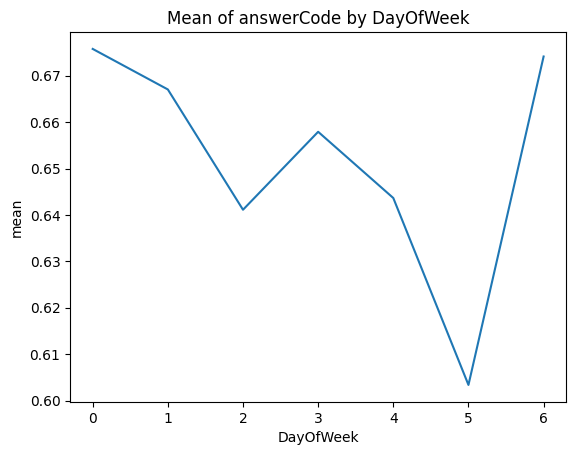

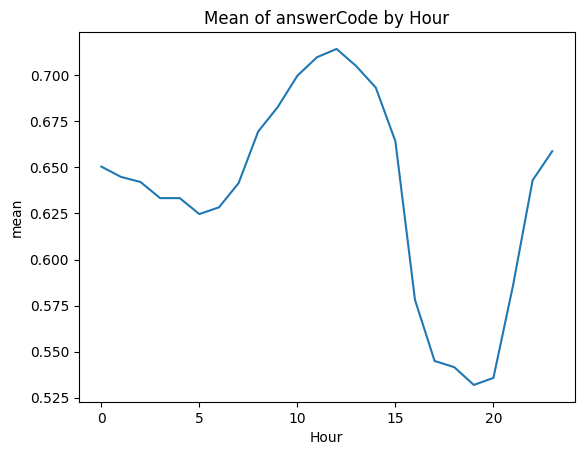

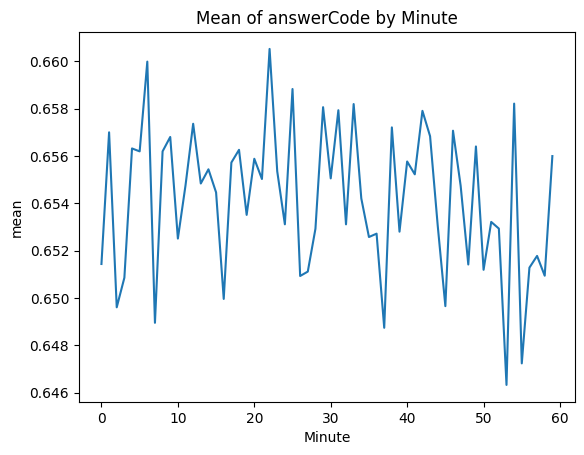

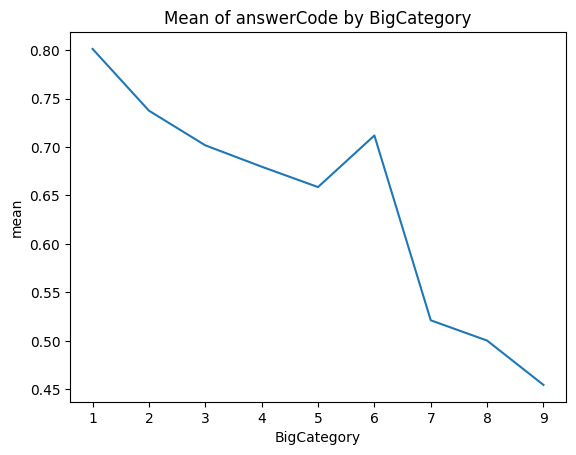

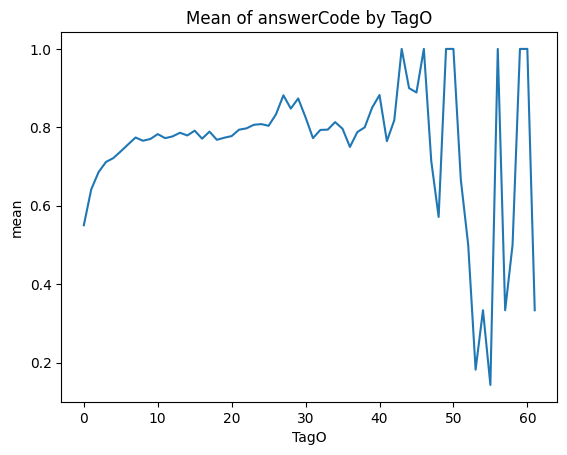

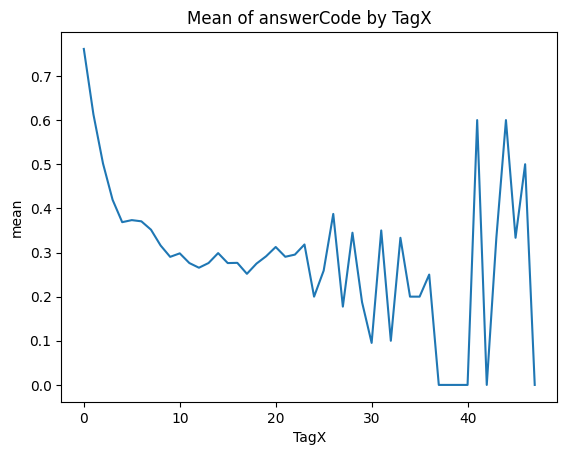

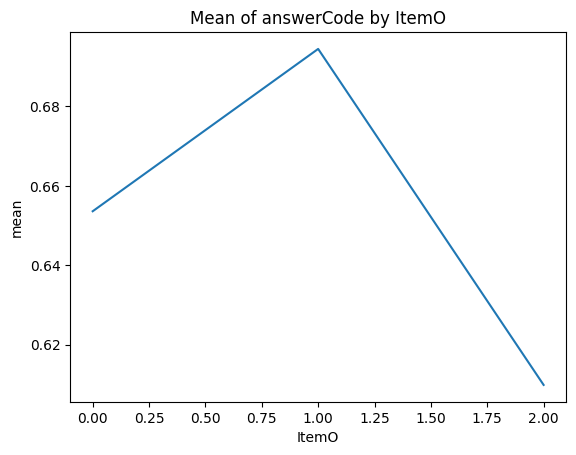

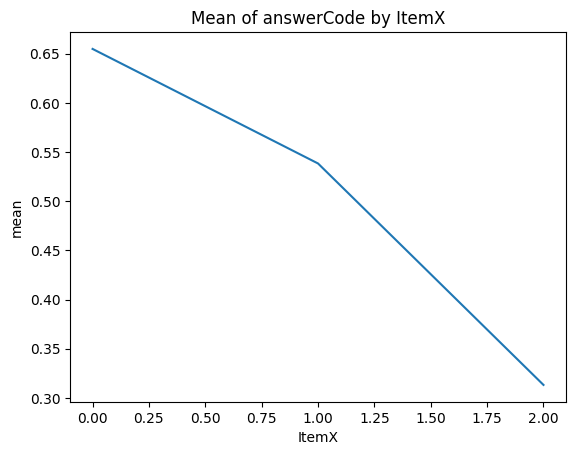

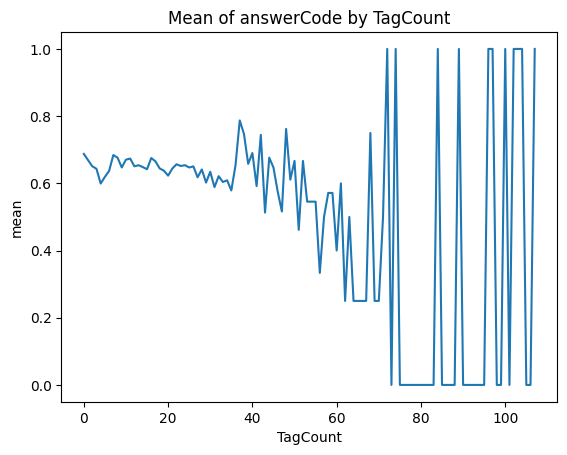

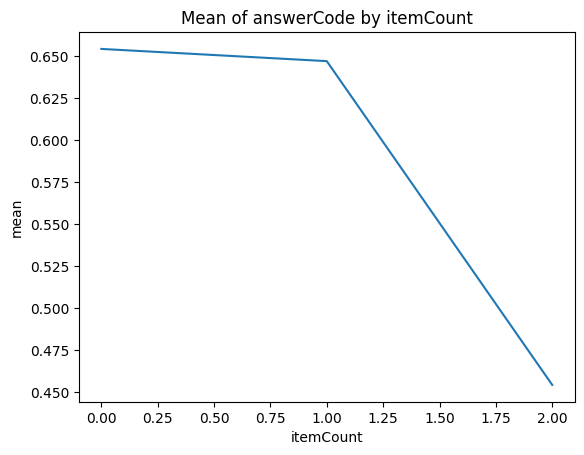

In [30]:
import matplotlib.pyplot as plt
for df in viz:
  plt.plot(df.index, df["mean"])
  plt.xlabel(df.index.name)
  plt.ylabel("mean")
  plt.title(f"Mean of answerCode by {df.index.name}")
  plt.show()


In [31]:
viz[-1].columns

Index(['mean', 'count'], dtype='object')

In [32]:
all_df.groupby("userID").agg("count")["answerCode"].describe()

count    7442.000000
mean      339.518947
std       321.468413
min         9.000000
25%        78.000000
50%       232.500000
75%       519.000000
max      1860.000000
Name: answerCode, dtype: float64

<Axes: >

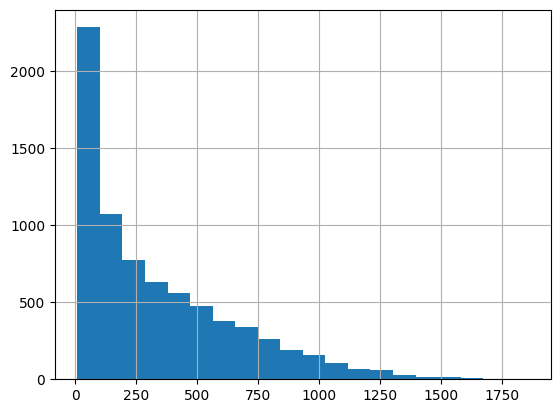

In [34]:
all_df.groupby("userID").agg("count")["answerCode"].hist(bins=20)